### DISCLAIMER

In [92]:
#source of dataset:
#https://www.kaggle.com/datasets/andrewmvd/pediatric-pneumonia-chest-xray

### IMPORT DEPENDENCIES

In [93]:
import os
from zipfile import ZipFile
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

### IMPORT DATASET

In [94]:
current_dir = os.getcwd()
zip_file = "dataset1.zip"

def extract_dataset(zip_dir):  
    # opening the zip file in READ mode 
    with ZipFile(zip_dir, 'r') as zip: 
        # printing all the contents of the zip file 
        zip.printdir() 
    
        # extracting all the files 
        print('Extracting all the files now...') 
        zip.extractall() 
        print('Done!') 

extract_dataset(zip_file)

File Name                                             Modified             Size
Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0001-0001.jpeg 2020-03-18 09:12:46       252680
Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0003-0001.jpeg 2020-03-18 09:12:46       329189
Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0005-0001.jpeg 2020-03-18 09:12:48       408620
Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0006-0001.jpeg 2020-03-18 09:12:48       252275
Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0007-0001.jpeg 2020-03-18 09:12:50       408508
Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0009-0001.jpeg 2020-03-18 09:12:50       312466
Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0010-0001.jpeg 2020-03-18 09:12:50       299115
Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0011-0001-0001.jpeg 2020-03-18 09:12:52       446983
Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0011-0001-0002.jpeg 2020-03-18 09:12:52       422882
Pediatric Chest X-ray Pneumonia/test/NORMAL/IM-0011-000

### CHECK DATASET

In [95]:
def create_train_val_test_dir(train_dir, test_dir):
    # Directory with training horse pictures
    train_pneumonia_dir = os.path.join(train_dir, 'PNEUMONIA')
    # Directory with training humans pictures
    train_normal_dir = os.path.join(train_dir, 'NORMAL')
    # Directory with validation horse pictures
    test_pneumonia_dir = os.path.join(test_dir, 'PNEUMONIA')
    # Directory with validation human pictures
    test_normal_dir = os.path.join(test_dir, 'NORMAL')

    print(f"There are {len(os.listdir(train_pneumonia_dir))} images of pneumonia for training.\n")
    print(f"There are {len(os.listdir(test_pneumonia_dir))} images of pneumonia for test.\n")
    print(f"There are {len(os.listdir(train_normal_dir))} images of pneumonia for training.\n")
    print(f"There are {len(os.listdir(test_normal_dir))} images of pneumonia for test.\n")

train_dir = 'Pediatric Chest X-ray Pneumonia/train'
test_dir = 'Pediatric Chest X-ray Pneumonia/test'
create_train_val_test_dir(train_dir, test_dir)

There are 3883 images of pneumonia for training.

There are 390 images of pneumonia for test.

There are 1349 images of pneumonia for training.

There are 234 images of pneumonia for test.



Sample pneumonia lung image:


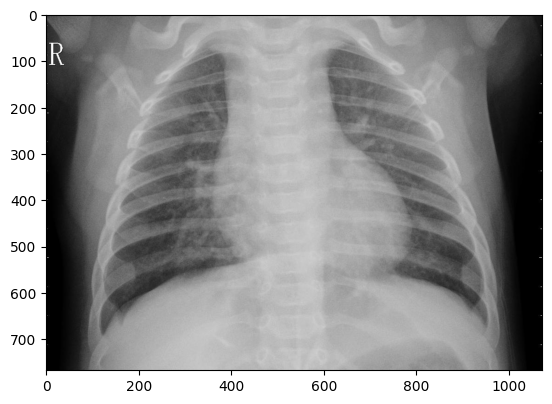


Sample normal lung image:


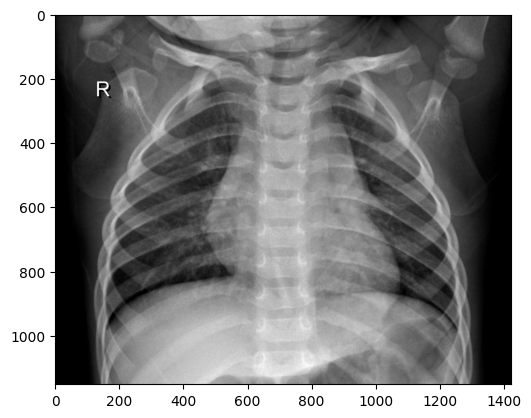

In [96]:
def check_sample(pneumonia_dir, normal_dir, index:int):
    print("Sample pneumonia lung image:")
    plt.imshow(load_img(f"{os.path.join(pneumonia_dir, os.listdir(pneumonia_dir)[index])}"))
    plt.show()

    print("\nSample normal lung image:")
    plt.imshow(load_img(f"{os.path.join(normal_dir, os.listdir(normal_dir)[index])}"))
    plt.show()

check_sample(train_pneumonia_dir, train_normal_dir, 1)

In [97]:
#Check Image Shape

def check_image_shape(index1:int, index2:int, index3:int):
    sample_image1  = load_img(f"{os.path.join(train_pneumonia_dir, os.listdir(train_pneumonia_dir)[index1])}")
    sample_image2  = load_img(f"{os.path.join(train_pneumonia_dir, os.listdir(train_pneumonia_dir)[index2])}")
    sample_image3  = load_img(f"{os.path.join(train_pneumonia_dir, os.listdir(train_pneumonia_dir)[index3])}")

    # Check image shape
    sample_array = [img_to_array(sample_image1), img_to_array(sample_image2), img_to_array(sample_image3)]

    for i in range(0,3):
        print(f"Each image {i} has shape: {sample_array[i].shape}")

check_image_shape(1,2,4)

Each image 0 has shape: (768, 1072, 3)
Each image 1 has shape: (863, 1244, 3)
Each image 2 has shape: (1280, 1488, 3)


this shows that images have different shape, we have to preprocess it first

### IMAGE AUGMENTATION

In [98]:
def create_image_generator(train_dir, test_dir):
    train_datagen = ImageDataGenerator(
        rescale = 1./255.,
        rotation_range = 40,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True
    )
    
    test_datagen = ImageDataGenerator(
        rescale = 1./255.
        )
    
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        batch_size = 20,
        class_mode = 'binary',
        target_size = (128,128)
    )

    test_generator = test_datagen.flow_from_directory(
        train_dir,
        batch_size = 20,
        class_mode = 'binary',
        target_size = (128,128)
    )

    return train_generator, test_generator
    

In [99]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (128,128,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=128, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid'),

    ])
    
    model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])
    
    return model

In [100]:
model = create_model()

history = model.fit(create_image_generator(train_dir,test_dir)[0],
                    epochs=15,
                    validation_data=create_image_generator(train_dir,test_dir)[1])

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 5232 images belonging to 2 classes.
Found 5232 images belonging to 2 classes.
Found 5232 images belonging to 2 classes.
Found 5232 images belonging to 2 classes.
Epoch 1/15


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


262/262 ━━━━━━━━━━━━━━━━━━━━ 147s 549ms/step - accuracy: 0.7224 - loss: 0.5839 - val_accuracy: 0.8681 - val_loss: 0.3126
Epoch 2/15
262/262 ━━━━━━━━━━━━━━━━━━━━ 115s 433ms/step - accuracy: 0.8145 - loss: 0.3915 - val_accuracy: 0.8524 - val_loss: 0.3118
Epoch 3/15
262/262 ━━━━━━━━━━━━━━━━━━━━ 120s 454ms/step - accuracy: 0.8441 - loss: 0.3484 - val_accuracy: 0.7940 - val_loss: 0.4127
Epoch 4/15
262/262 ━━━━━━━━━━━━━━━━━━━━ 116s 441ms/step - accuracy: 0.8635 - loss: 0.3231 - val_accuracy: 0.9216 - val_loss: 0.2212
Epoch 5/15
262/262 ━━━━━━━━━━━━━━━━━━━━ 117s 442ms/step - accuracy: 0.8790 - loss: 0.2988 - val_accuracy: 0.8654 - val_loss: 0.2862
Epoch 6/15
262/262 ━━━━━━━━━━━━━━━━━━━━ 114s 432ms/step - accuracy: 0.8755 - loss: 0.2814 - val_accuracy: 0.8641 - val_loss: 0.3015
Epoch 7/15
262/262 ━━━━━━━━━━━━━━━━━━━━ 114s 430ms/step - accuracy: 0.8809 - loss: 0.2673 - val_accuracy: 0.9002 - val_loss: 0.2417
Epoch 8/15
262/262 ━━━━━━━━━━━━━━━━━━━━ 112s 425ms/step - accuracy: 0.8986 - loss: 0.25

### EVALUATION

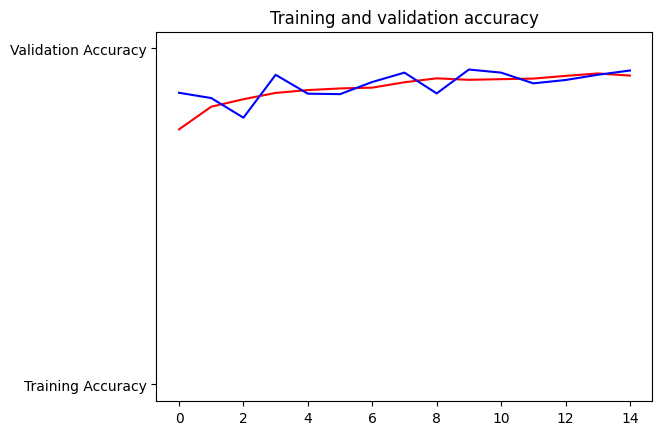

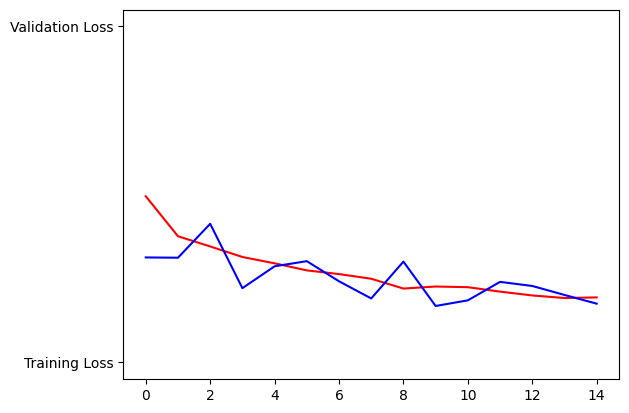

In [101]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()